# Wine_Quality_Prediction

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px

In [18]:
df=pd.read_csv("C:\\Users\\Sandipa\\Downloads\\WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Data Loading and Cleaning 

In [19]:
print("Shape The Data Set ", df.shape )

Shape The Data Set  (1143, 13)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [21]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [22]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [23]:
df.drop(columns="Id",inplace=True)


#the unique quality 

print("The Value Quality ",df["quality"].unique())

The Value Quality  [5 6 7 4 8 3]


In [24]:
ave_qu = df.groupby("quality").mean().round(2)
ave_qu

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.45,0.90,0.21,2.67,0.11,8.17,24.50,1.0,3.36,0.55,9.69
4,7.81,0.70,0.17,2.57,0.09,14.85,40.61,1.0,3.39,0.64,10.26
5,8.16,0.59,0.24,2.54,0.09,16.61,55.30,1.0,3.30,0.61,9.90
6,8.32,0.50,0.26,2.44,0.09,15.22,39.94,1.0,3.32,0.68,10.66
7,8.85,0.39,0.39,2.76,0.08,14.54,37.49,1.0,3.29,0.74,11.48
8,8.81,0.41,0.43,2.64,0.07,11.06,29.38,1.0,3.24,0.77,11.94


### Data Analysis 

<Axes: xlabel='quality'>

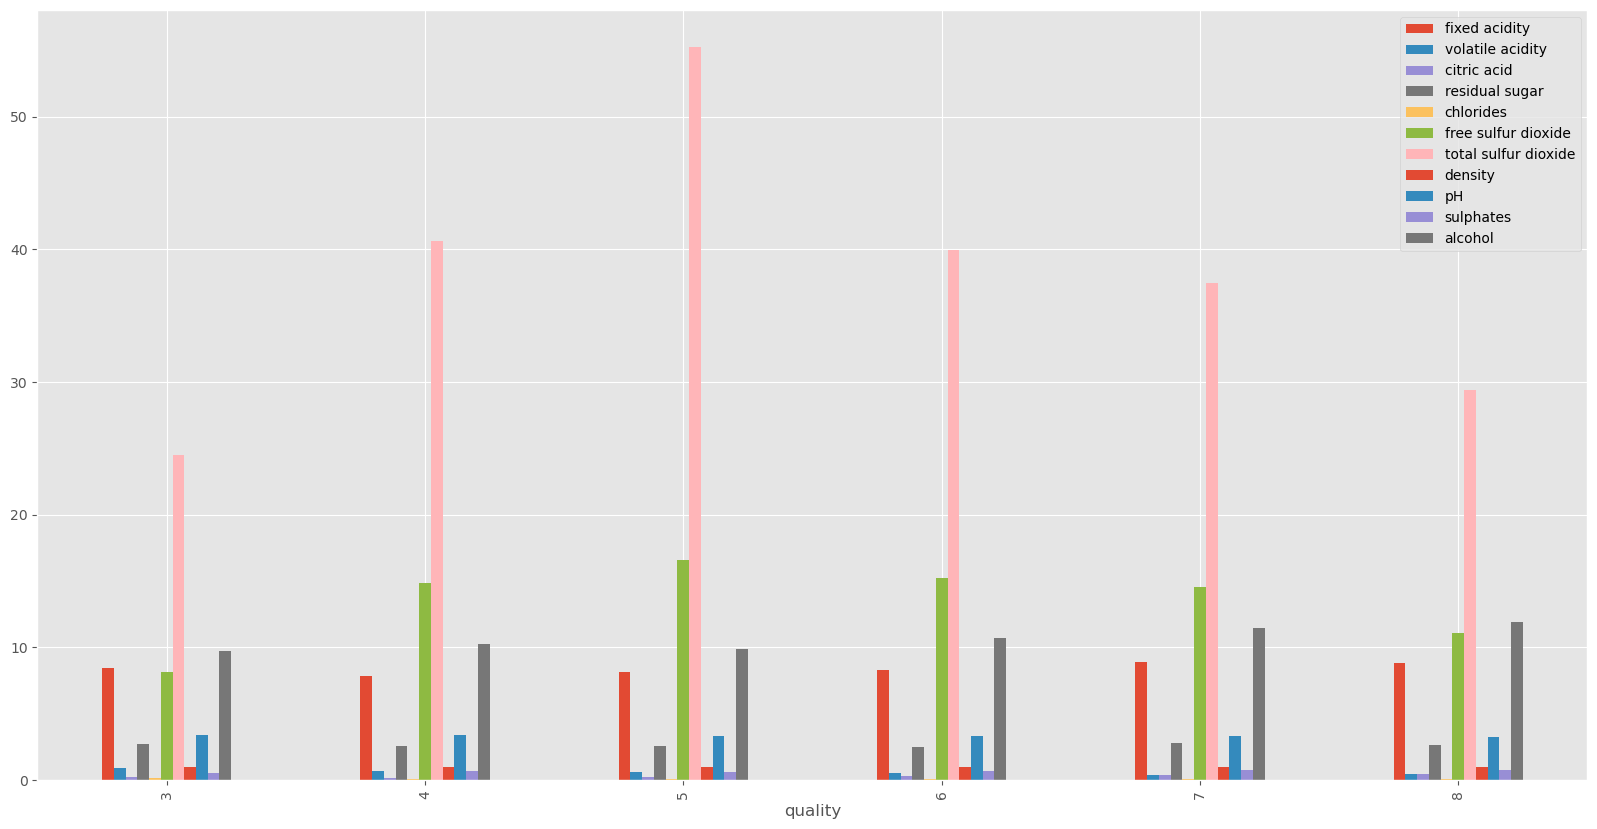

In [25]:
# graph the group by\
ave_qu.plot(kind="bar",figsize=(20,10))

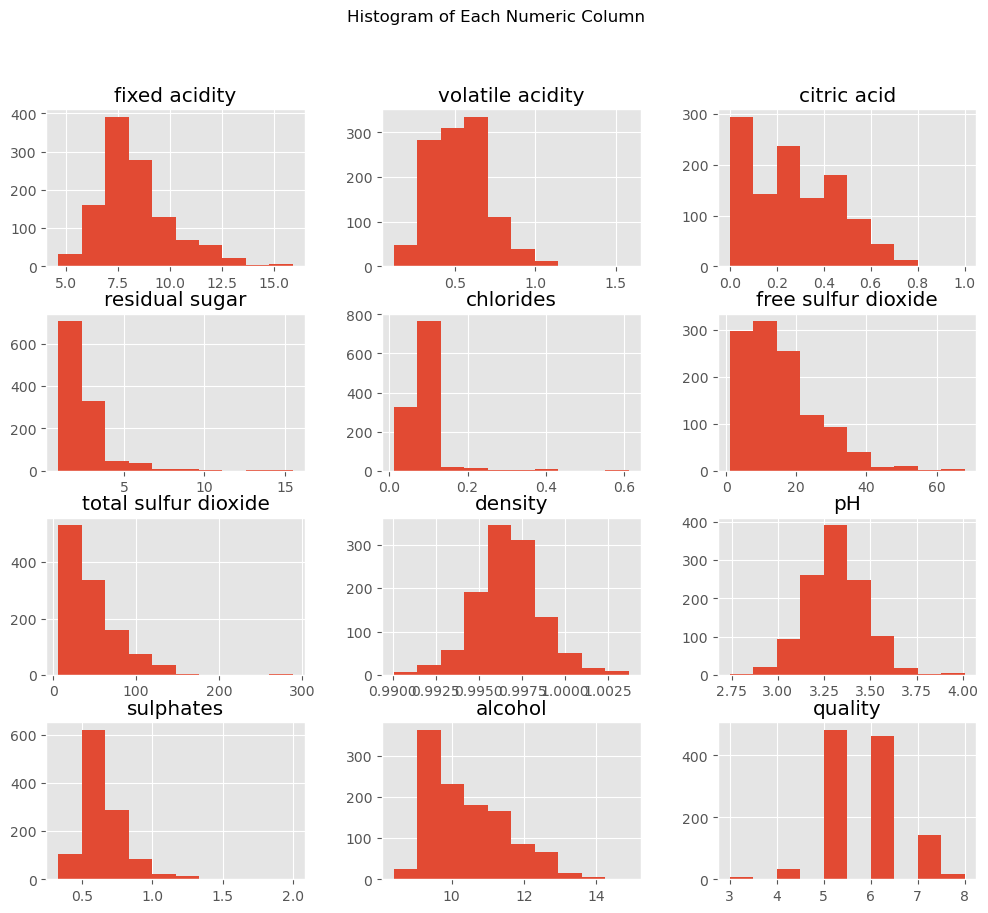

In [26]:
df.hist(figsize=(12, 10))
plt.suptitle('Histogram of Each Numeric Column')
plt.show()

C:\Users\Sandipa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sandipa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sandipa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sandipa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

<Figure size 1200x1000 with 0 Axes>

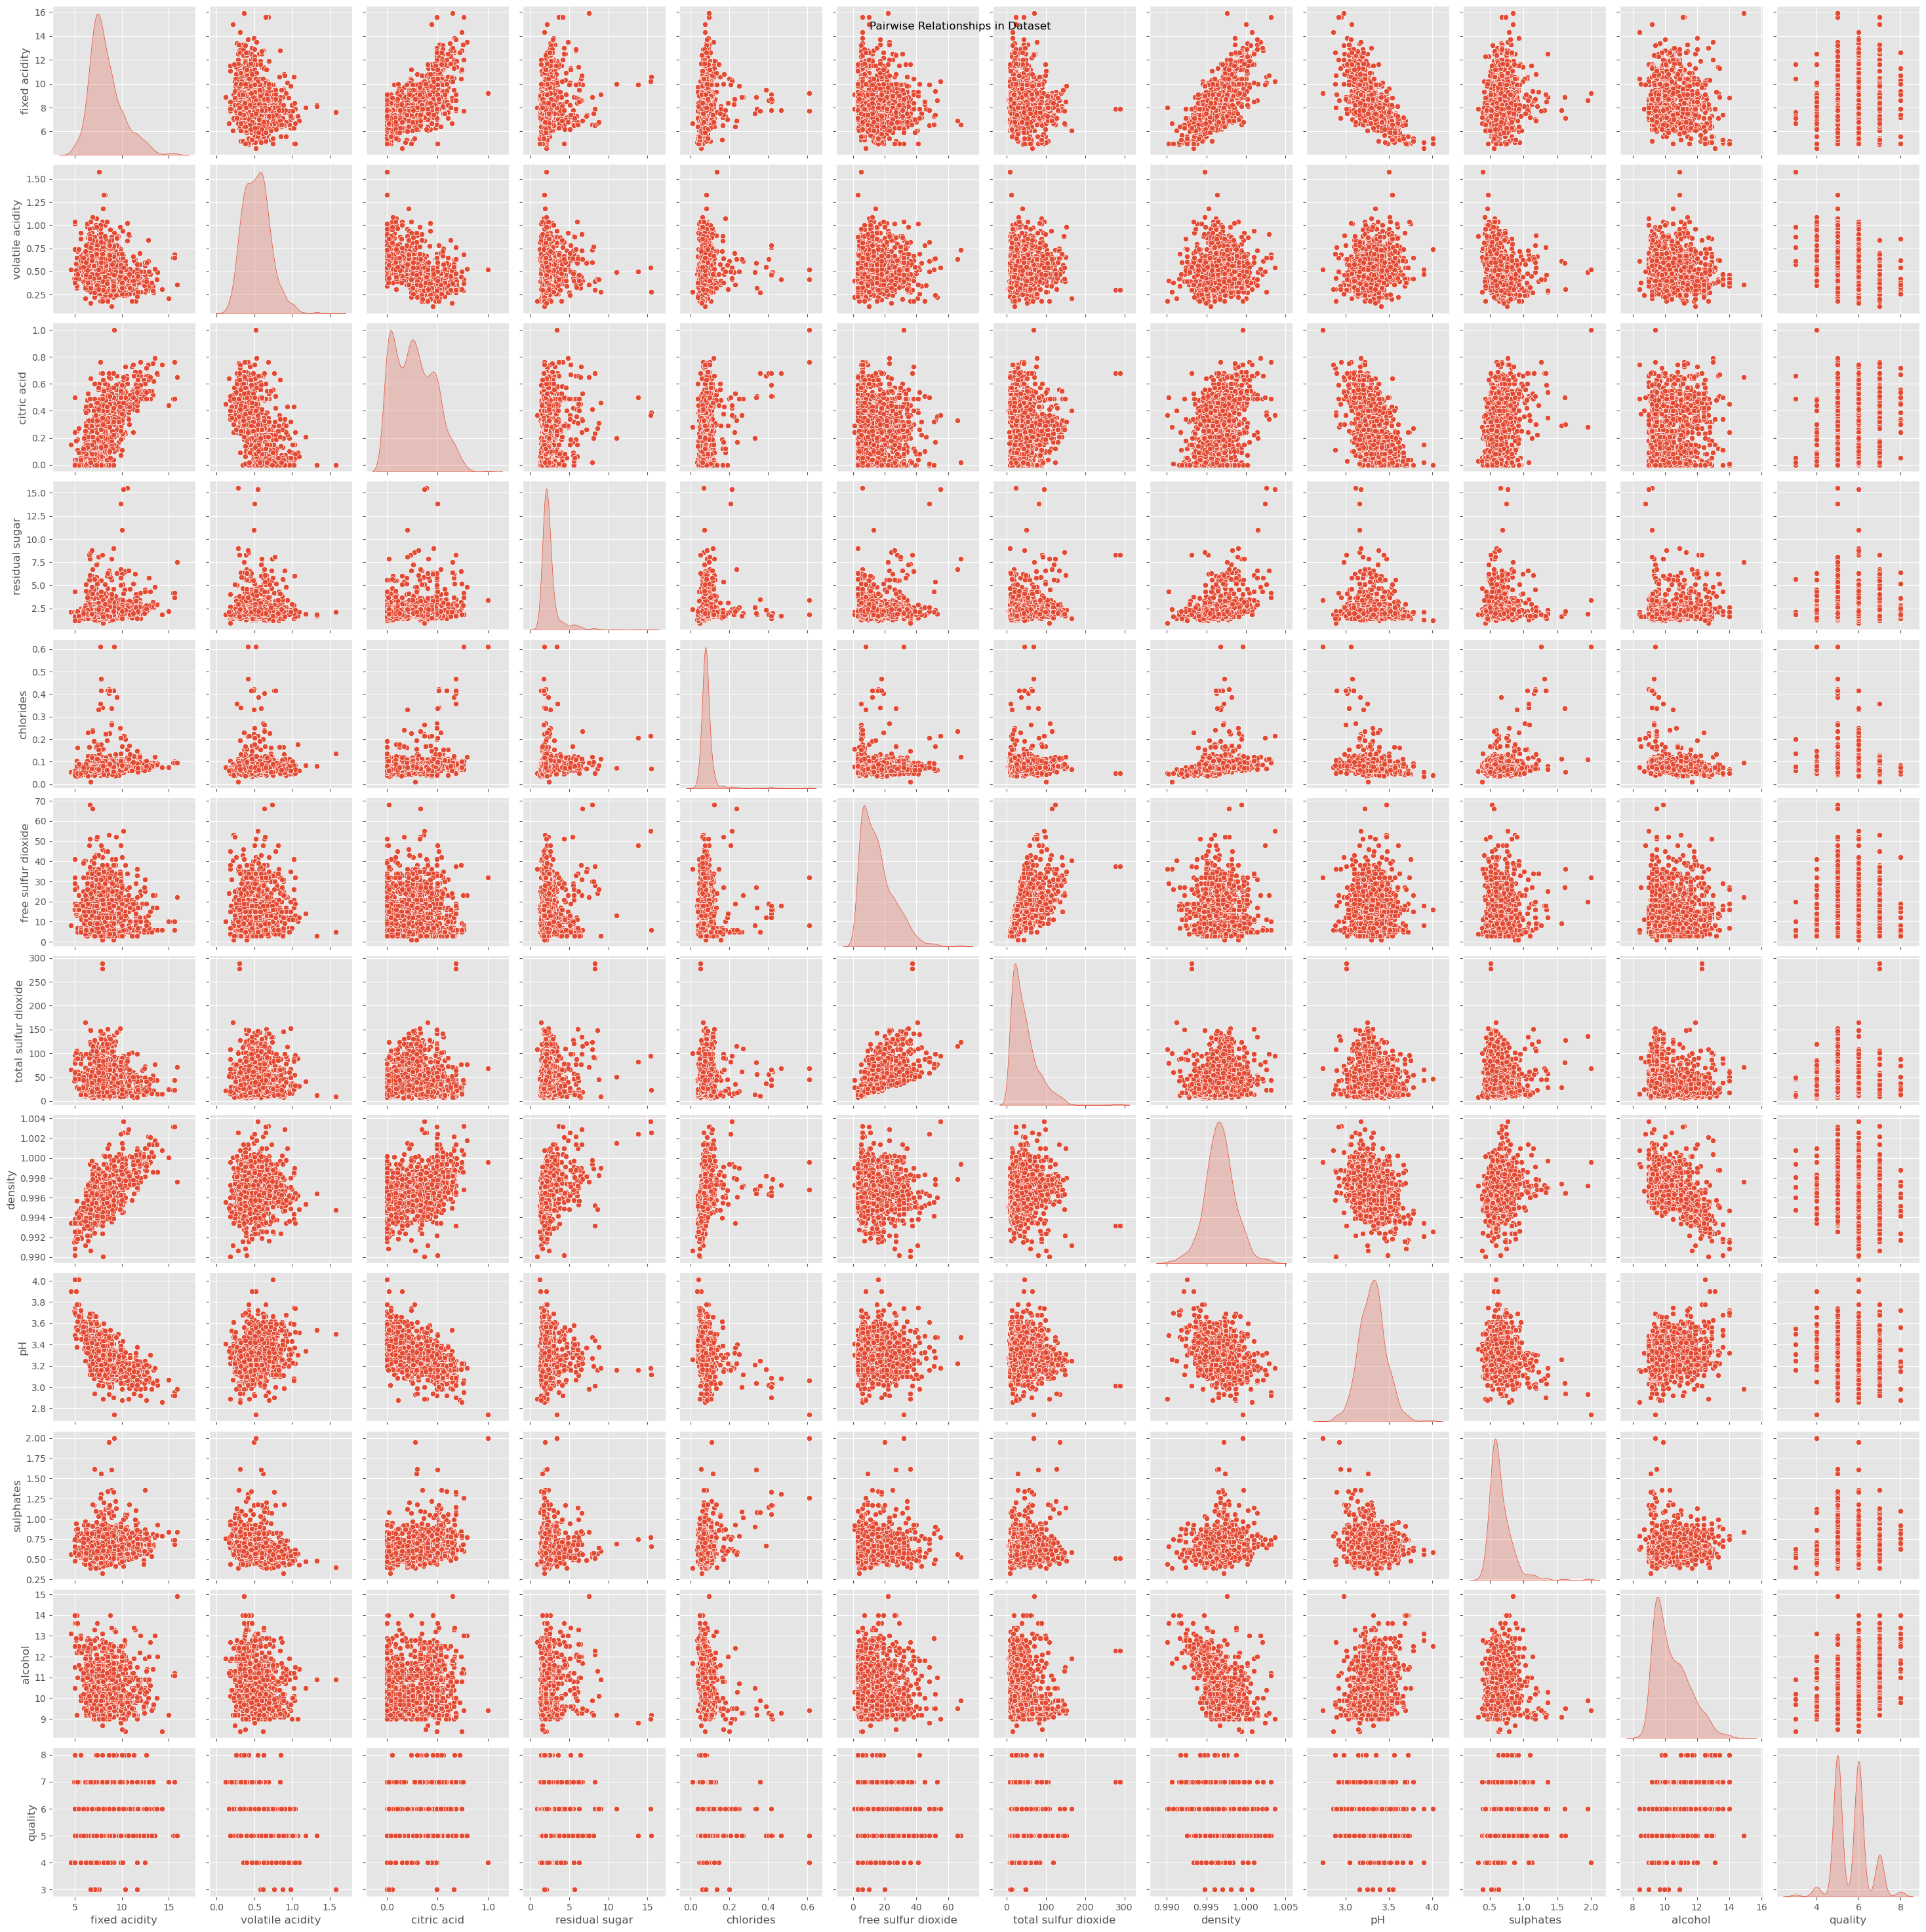

In [27]:
plt.figure(figsize=(12, 10))
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairwise Relationships in Dataset')
plt.show()

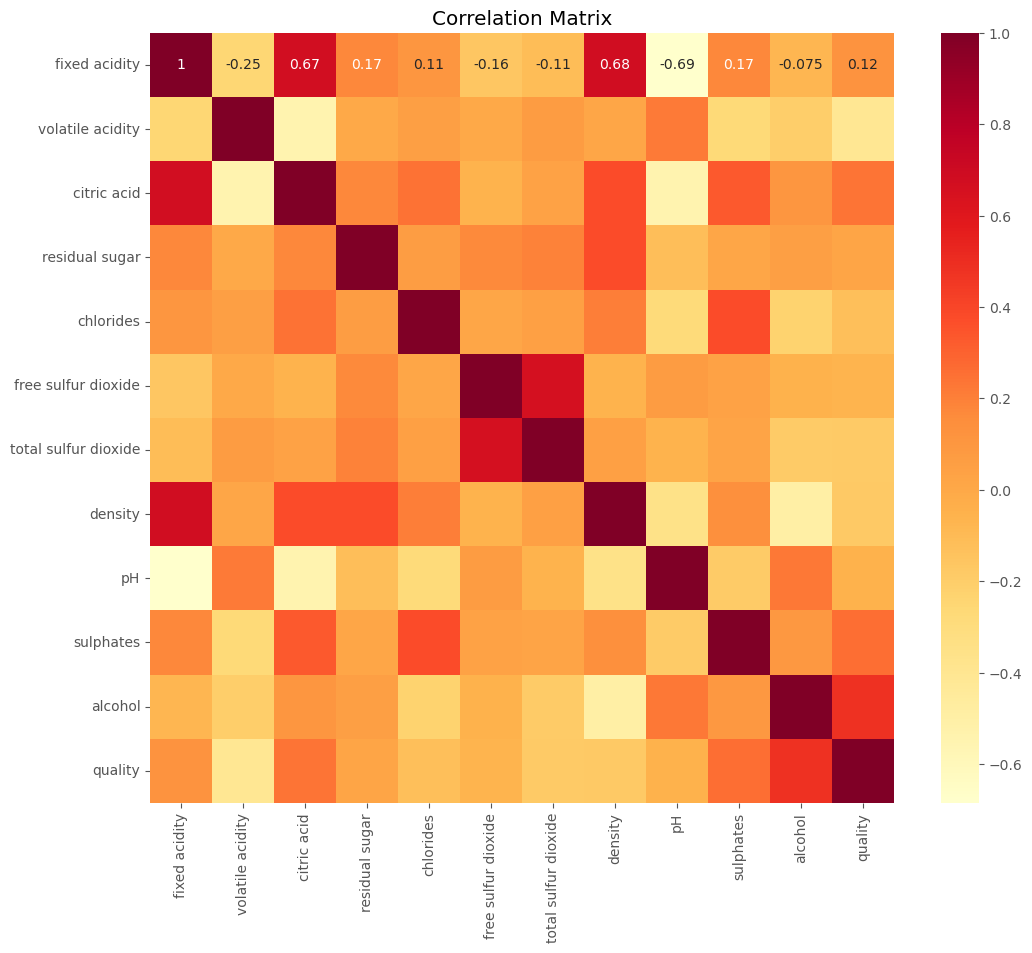

In [28]:
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()

### Data Visualization 

<Figure size 1000x600 with 0 Axes>

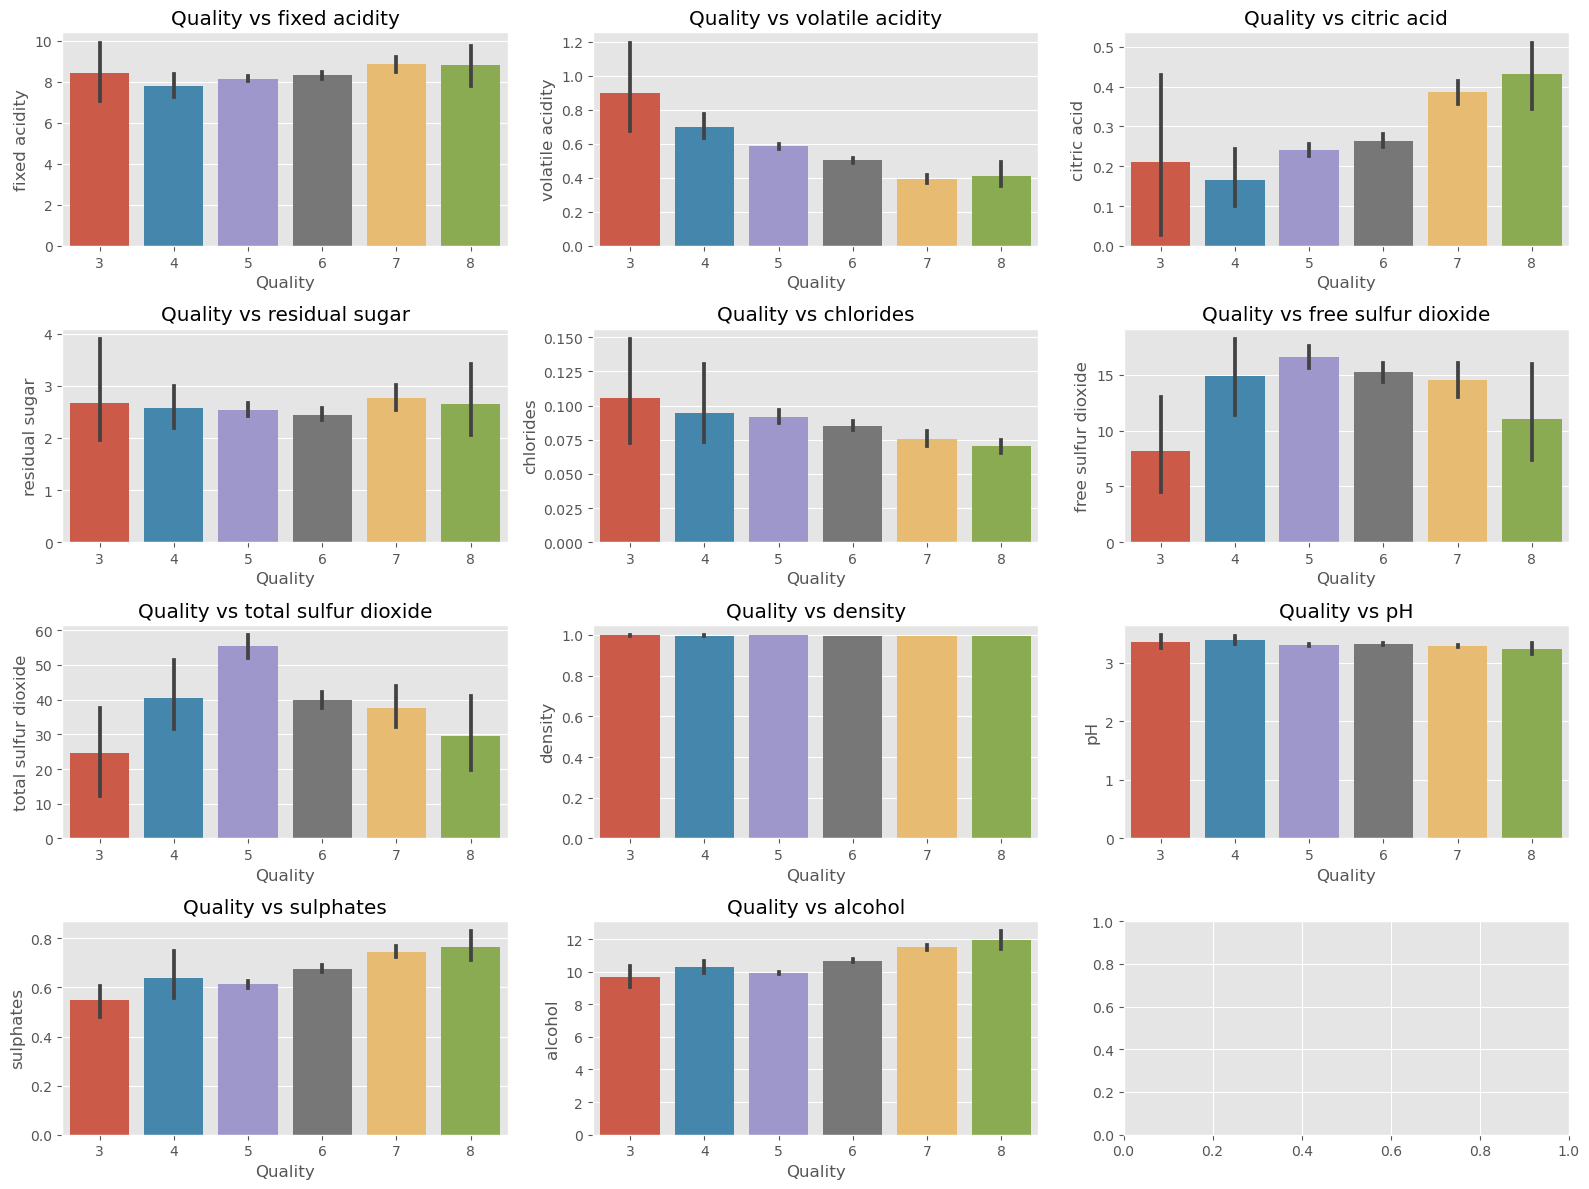

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'wine'
fig = plt.figure(figsize=(10, 6))

# Get a list of feature columns
features = [col for col in df.columns if col != 'quality']

# Create a grid of subplots
num_rows = 4
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

# Iterate over the features and create bar plots
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    
    sns.barplot(x='quality', y=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Quality vs {feature}')
    axes[row, col].set_xlabel('Quality')
    axes[row, col].set_ylabel(feature)
    
plt.tight_layout()
plt.show()

### Chemical Qualities

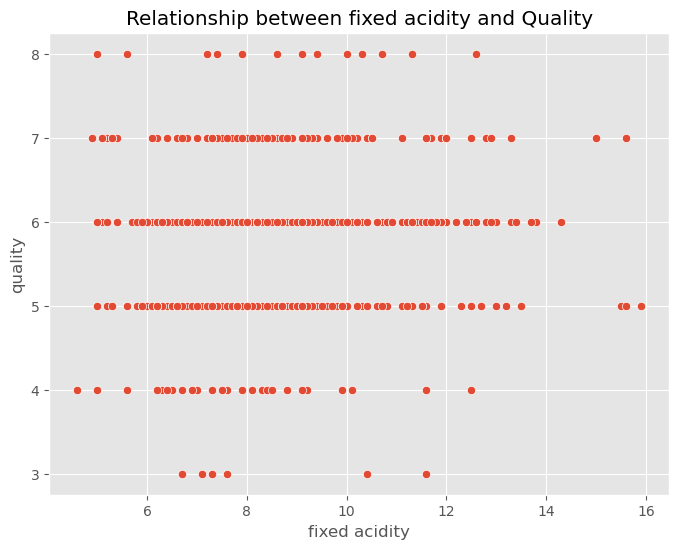

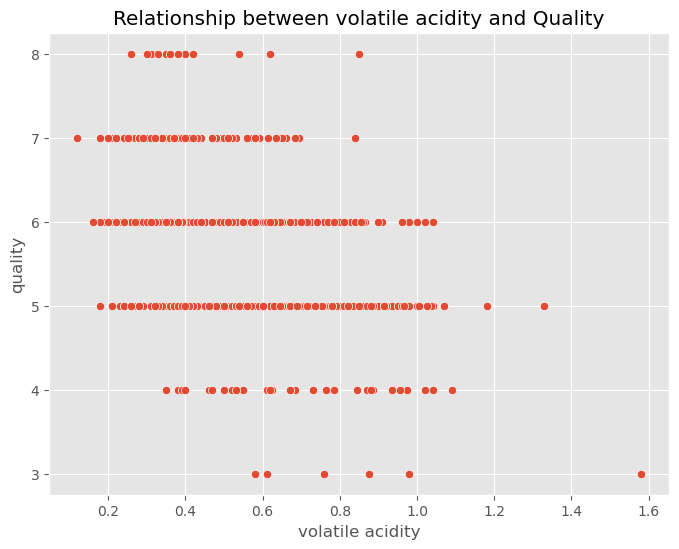

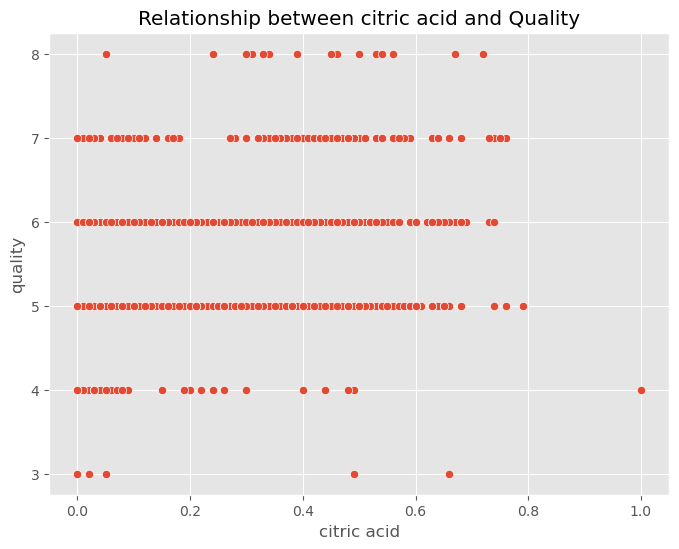

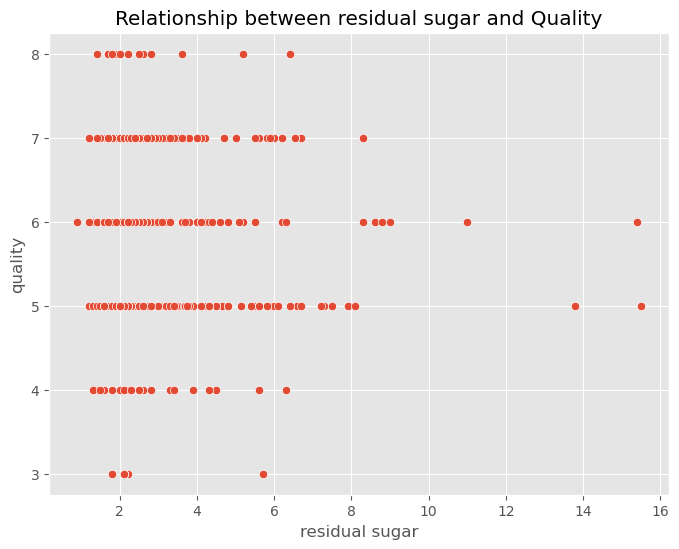

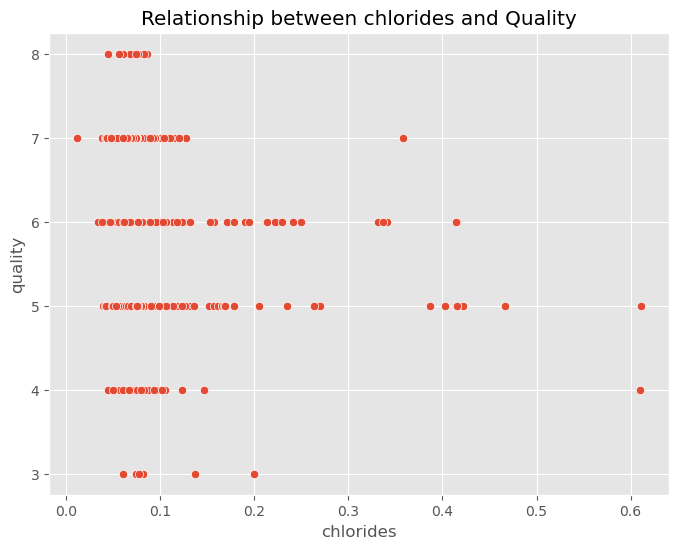

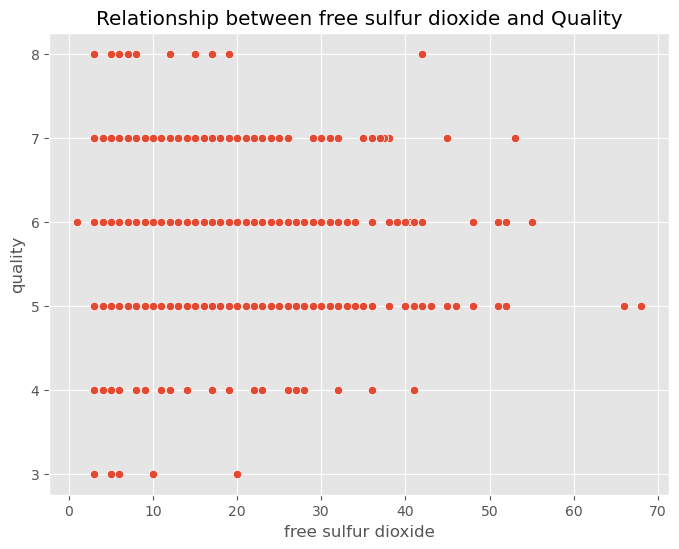

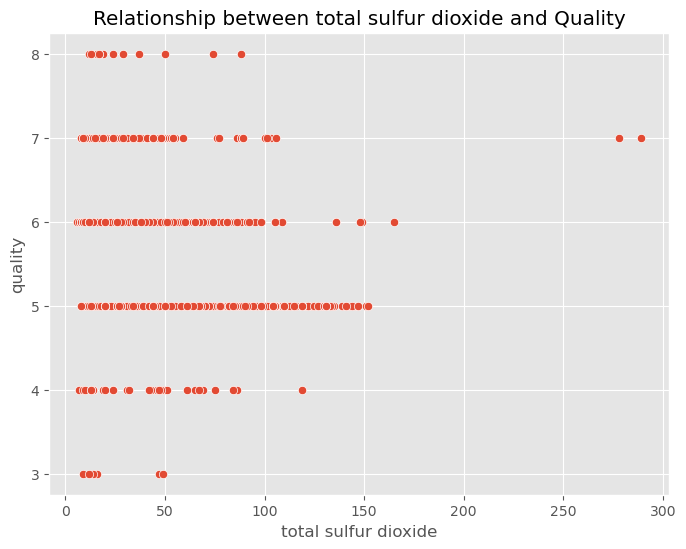

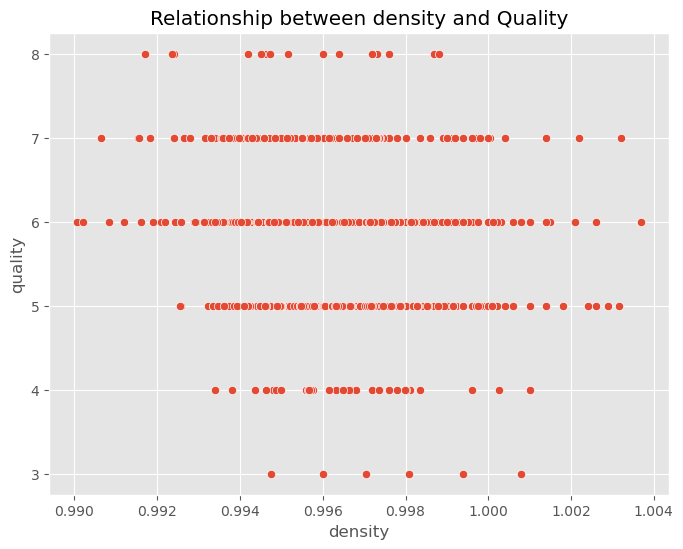

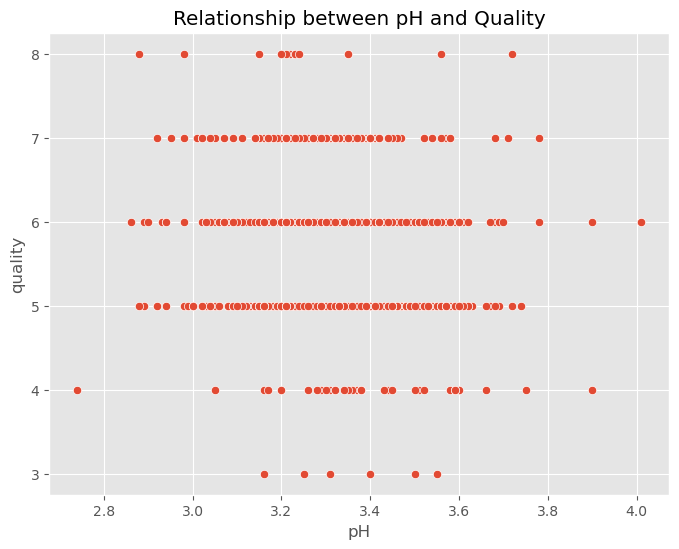

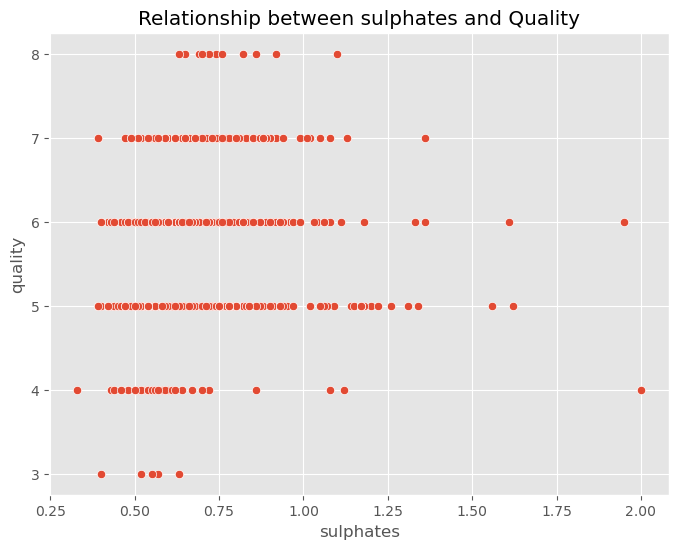

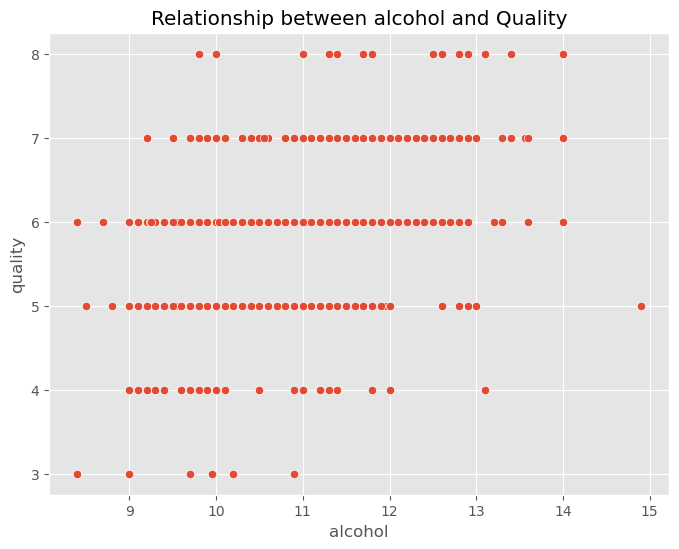

In [55]:
for col in df.columns:
    if col != 'quality':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=col, y='quality', data=df)
        plt.title(f'Relationship between {col} and Quality')
        plt.show()

### Classifier Models

In [30]:
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC ,SVR

from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.linear_model import RidgeCV
from catboost import CatBoostRegressor,CatBoostClassifier
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor

In [31]:
X = df.drop(columns="quality")           
y = df["quality"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (857, 11)
X Test  :  (286, 11)
Y Train :  (857,)
Y Test  :  (286,)


#### Linear_Regression

In [33]:
# using the model LinearRegression
LR_model=LinearRegression()

# fit model
LR_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", LR_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", LR_model.score(X_test,y_test))

# Expected value Y using X test
y_pred_LR=LR_model.predict(X_test)

# Model Evaluation
print( " Model Evaluation Linear R : mean absolute error is ", mean_absolute_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : mean squared  error is " , mean_squared_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : median absolute error is " ,median_absolute_error(y_test,y_pred_LR)) 

Score the X-train with Y-train is :  0.3766893166865495
Score the X-test  with Y-test  is :  0.3487901433645907
 Model Evaluation Linear R : mean absolute error is  0.4742577332205512
 Model Evaluation Linear R : mean squared  error is  0.37215517566167305
 Model Evaluation Linear R : median absolute error is  0.3771988566534432


#### Logistics_Regression 

In [34]:
# using the model Logistic Regression
Lo_model=LogisticRegression(solver='liblinear')

# fit model

Lo_model.fit(X_train,y_train)


# Score X and Y - test and train model Logistic Regression

print("Score the X-train with Y-train is : ", Lo_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", Lo_model.score(X_test,y_test))

# Expected value Y using X test
y_pred_Lo=Lo_model.predict(X_test)

# Model Evaluation
print( " Model Evaluation Logistic R : mean absolute error is ", mean_absolute_error(y_test,y_pred_Lo))
print(" Model Evaluation Logistic R : mean squared  error is " , mean_squared_error(y_test,y_pred_Lo))
print(" Model Evaluation Logistic R : median absolute error is " ,median_absolute_error(y_test,y_pred_Lo))

Score the X-train with Y-train is :  0.5869311551925321
Score the X-test  with Y-test  is :  0.6258741258741258
 Model Evaluation Logistic R : mean absolute error is  0.4020979020979021
 Model Evaluation Logistic R : mean squared  error is  0.458041958041958
 Model Evaluation Logistic R : median absolute error is  0.0


#### Decision_Tree_Classifier 

In [35]:
# using the model Decision Tree Classifier
Tree_model=DecisionTreeClassifier(max_depth=10)
# fit model
Tree_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", Tree_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", Tree_model.score(X_test,y_test))

Score the X-train with Y-train is :  0.9253208868144691
Score the X-test  with Y-test  is :  0.534965034965035


In [36]:
print("The Important columns \n",Tree_model.feature_importances_)

The Important columns 
 [0.07865558 0.11499387 0.04747695 0.07144284 0.06712891 0.08409932
 0.09661158 0.03245576 0.07700133 0.13037102 0.19976284]


In [37]:
print("The classes ",Tree_model.classes_)

y_pred_T =Tree_model.predict(X_test)

print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_T))

The classes  [3 4 5 6 7 8]
 Model Evaluation Decision Tree : accuracy score  0.534965034965035


#### Random Forest Classifier 

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [39]:
X = df.drop(columns="quality")           
y = df["quality"]

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.80      0.76        96
           6       0.68      0.67      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.42      0.43      0.43       229
weighted avg       0.68      0.70      0.69       229



C:\Users\Sandipa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sandipa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sandipa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Stochastic Gradient Descent 

In [43]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [45]:
x = df.drop('quality',axis=1)
y = df['quality']

In [46]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=42,test_size=0.3)
x_train.shape , x_test.shape

((800, 11), (343, 11))

In [47]:
model = Sequential()
model.add(Dense(16,activation='relu',input_dim = x_train.shape[1]))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='SGD',loss = 'mean_squared_error',metrics = ['mse'])

model.summary()

C:\Users\Sandipa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
history_sgd = model.fit(x_train , y_train , epochs = 50 , validation_data = (x_test , y_test))

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 494.9909 - mse: 494.9909 - val_loss: 13.1657 - val_mse: 13.1657
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.3171 - mse: 10.3171 - val_loss: 5.1986 - val_mse: 5.1986
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.2712 - mse: 4.2712 - val_loss: 2.2832 - val_mse: 2.2832
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9005 - mse: 1.9005 - val_loss: 1.2130 - val_mse: 1.2130
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1563 - mse: 1.1563 - val_loss: 0.8205 - val_mse: 0.8205
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9000 - mse: 0.9000 - val_loss: 0.6740 - val_mse: 0.6740
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7775 - mse: 0.7775 - val_loss: 0.6182 - val_mse: 0.6182
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7688 - mse: 0.7688 - val_loss: 0.5972 - val_mse: 0.5972
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.691

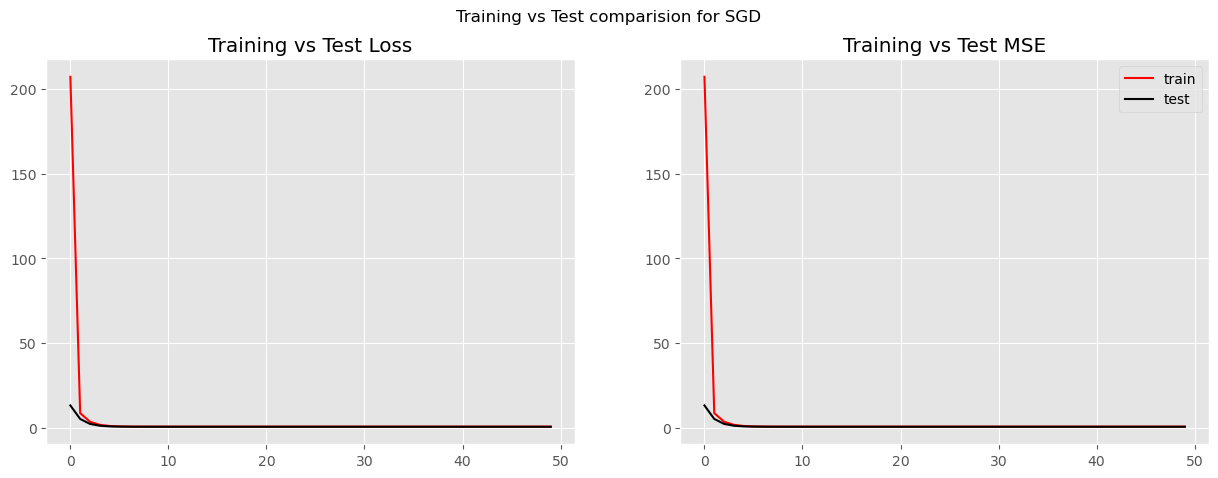

In [49]:
plt.figure(figsize=(15,5))

plt.suptitle(f'Training vs Test comparision for SGD')

plt.subplot(121)

plt.title(f'Training vs Test Loss')

plt.plot(history_sgd.history['loss'], color='red', label='train')
plt.plot(history_sgd.history['val_loss'], color='black', label='test')



plt.subplot(122)
plt.title(f'Training vs Test MSE')
plt.plot(history_sgd.history['mse'], color='red', label='train')
plt.plot(history_sgd.history['val_mse'], color='black', label='test')


plt.legend()
plt.show()

#### Support Vector Classifier (SVC) 

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the SVC model
svc_model = SVC(C=50, kernel="rbf")

# Fit the model on the training data
svc_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svc = svc_model.predict(X_test)

# Evaluate the model
print("Score the X-train with Y-train is : ", svc_model.score(X_train, y_train))
print("Score the X-test with Y-test is : ", svc_model.score(X_test, y_test))
print("Model Evaluation SVC: accuracy score", accuracy_score(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))

Score the X-train with Y-train is :  0.5984682713347921
Score the X-test with Y-test is :  0.6462882096069869
Model Evaluation SVC: accuracy score 0.6462882096069869
Confusion Matrix:
 [[ 0  3  3  0  0]
 [ 0 81 15  0  0]
 [ 0 33 66  0  0]
 [ 0  0 25  1  0]
 [ 0  0  2  0  0]]
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.69      0.84      0.76        96
           6       0.59      0.67      0.63        99
           7       1.00      0.04      0.07        26
           8       0.00      0.00      0.00         2

    accuracy                           0.65       229
   macro avg       0.46      0.31      0.29       229
weighted avg       0.66      0.65      0.60       229



C:\Users\Sandipa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sandipa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sandipa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
